In [1]:
#@title Setup
transformers_version = "v4.29.1" #@param ["main", "v4.29.1"] {allow-input: true}

print(f"Setting up everything with transformers version {transformers_version}")

!pip install huggingface_hub>=0.14.1 git+https://github.com/huggingface/transformers@$transformers_version -q diffusers accelerate datasets torch soundfile sentencepiece opencv-python openai

import IPython
import soundfile as sf

def play_audio(audio):
    sf.write("speech_converted.wav", audio.numpy(), samplerate=16000)
    return IPython.display.Audio("speech_converted.wav")

from huggingface_hub import notebook_login
notebook_login()

Setting up everything with transformers version v4.29.1


In [2]:
#@title Agent init
agent_name = "OpenAI (API Key)" #@param ["StarCoder (HF Token)", "OpenAssistant (HF Token)", "OpenAI (API Key)"]

import getpass

if agent_name == "StarCoder (HF Token)":
    from transformers.tools import HfAgent
    agent = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoder")
    print("StarCoder is initialized 💪")
elif agent_name == "OpenAssistant (HF Token)":
    from transformers.tools import HfAgent
    agent = HfAgent(url_endpoint="https://api-inference.huggingface.co/models/OpenAssistant/oasst-sft-4-pythia-12b-epoch-3.5")
    print("OpenAssistant is initialized 💪")
if agent_name == "OpenAI (API Key)":
    from transformers.tools import OpenAiAgent
    pswd = getpass.getpass('OpenAI API key:')
    agent = OpenAiAgent(model="text-davinci-003", api_key=pswd)
    print("OpenAI is initialized 💪")

2023-05-11 20:26:33.675919: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


OpenAI API key:········
OpenAI is initialized 💪


### Using the agent
The agent is initialized! We now have access to the full power of the tools it has access to.

Let's use it 😎

==Explanation from the agent==
I will use the following  tool: `image_generator` to generate an image according to the prompt.


==Code generated by the agent==
image = image_generator(prompt="A boat in the water")


==Result==


/home/gensyn/anaconda3/lib/python3.10/site-packages/transformers/modeling_utils.py:433: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  with safe_open(checkpoint_file, framework="pt") as f:
/home/gensyn/anaconda3/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/home/gensyn/anaconda3/lib/python3.10/site-packages/torch/storage.py:899: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage 

  0%|          | 0/25 [00:00<?, ?it/s]

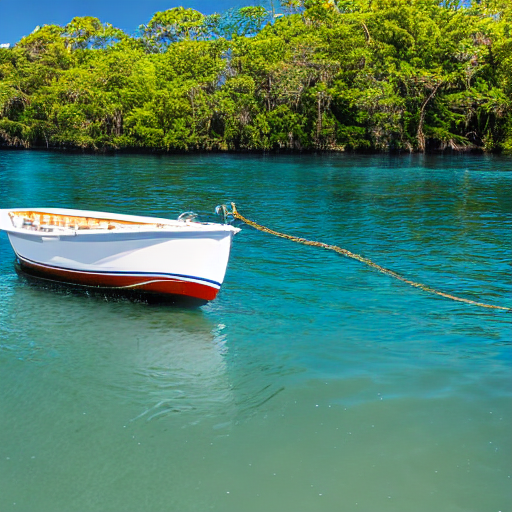

In [3]:
boat = agent.run("Generate an image of a boat in the water")
boat

If you'd like to hand objects (or previous results!) to the agent, you can do so by passing a variable directly, and mentioning between backticks the name of the variable passed. For example, if I want to re-use the previous boat generation:

In [4]:
caption = agent.run("Can you caption the `boat_image`?", boat_image=boat)
caption

==Explanation from the agent==
I will use the following  tool: `image_captioner` to generate a caption for the image.


==Code generated by the agent==
caption = image_captioner(boat_image)


==Result==


/home/gensyn/anaconda3/lib/python3.10/site-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'a boat tied to a rope in the water'

Agents vary in competency and their capacity to handle several instructions at once; however the strongest of them (such as OpenAI's) are able to handle complex instructions such as the following three-part instruction:

In [5]:
audio = agent.run("Can you generate an image of a boat? Please read out loud the contents of the image afterwards")
play_audio(audio)

==Explanation from the agent==
I will use the following  tools: `image_generator` to generate an image of a boat, then `text_reader` to read out loud the contents of the image.


==Code generated by the agent==
image = image_generator(prompt="boat")
caption = image_captioner(image)
print(f"The caption is {caption}.")
audio_caption = text_reader(caption)


==Result==


  0%|          | 0/25 [00:00<?, ?it/s]

The caption is a wooden boat floating in the ocean.


Found cached dataset cmu-arctic-xvectors (/home/gensyn/.cache/huggingface/datasets/Matthijs___cmu-arctic-xvectors/default/0.0.1/a62fea1f9415e240301ea0042ffad2a3aadf4d1caa7f9a8d9512d631723e781f)


Where this works great is when your query implies the use of tools which you haven't described directly. An exemple of this would be the following query: "Read out loud the summary of hf.co"

Here we're asking the model to perform three steps at once:

Fetch the website https://huggingface.co
Summarize it
Translate the text to speech

In [6]:
audio = agent.run("Read out loud the summary of http://hf.co")
play_audio(audio)

==Explanation from the agent==
I will use the following  tools: `text_downloader` to download the text from the URL, `summarizer` to create a summary of the text, and `text_reader` to read it out loud.


==Code generated by the agent==
text = text_downloader(url="http://hf.co")
summarized_text = summarizer(text)
print(f"Summary: {summarized_text}")
audio_summary = text_reader(summarized_text)


==Result==


/home/gensyn/anaconda3/lib/python3.10/site-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (142) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Summary: Hugging Face is an AI community building the future. More than 5,000 organizations are using Hugging Face. The community's best AI chat models are available to everyone. Transformers is a natural language processing library and its hub is now open to all ML models.


Found cached dataset cmu-arctic-xvectors (/home/gensyn/.cache/huggingface/datasets/Matthijs___cmu-arctic-xvectors/default/0.0.1/a62fea1f9415e240301ea0042ffad2a3aadf4d1caa7f9a8d9512d631723e781f)


### Chat mode

So far, we've been using the agent by using it's `.run` command. But that's not the only command it has access to; the second command it has access to is `.chat`, which enables using it in chat mode.

The difference between the two is relative to their memory:
- `.run` does not keep memory across runs, but performs better for multiple operations at once (such as running two, or three tools in a row from a given instruction)
- `.chat` keeps memory across runs, but performs better at single instructions.

Let's use it in chat mode!

==Explanation from the agent==
I will use the tool `image_generator` to generate an image of a capybara.


==Code generated by the agent==
image = image_generator(prompt="Capybara")


==Result==


  0%|          | 0/25 [00:00<?, ?it/s]

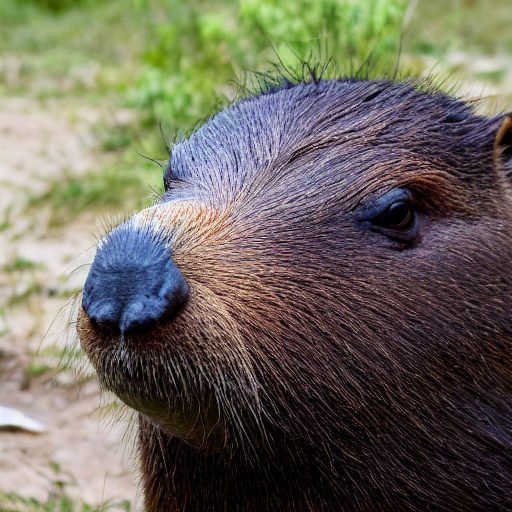

In [10]:
agent.chat("Show me an an image of a capybara")

What if we wanted to change something in the image? For example, move the capybaras to a snowy environment

==Explanation from the agent==
I will use the tool `image_transformer` to transform the image so that it snows.


==Code generated by the agent==
transformed_image = image_transformer(image, prompt="snow")


==Result==


  0%|          | 0/50 [00:00<?, ?it/s]

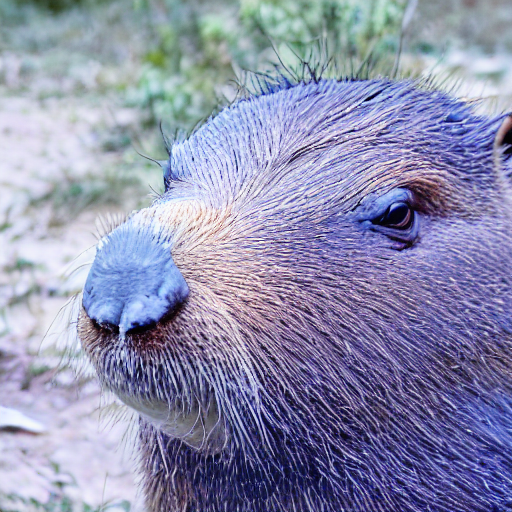

In [11]:
agent.chat("Transform the image so that it snows")

Now what if we wanted to remove the capybara in favor of something else? We could ask it to show us a mask of the capybara in the image:

==Explanation from the agent==
I will use the tool `image_segmenter` to create a segmentation mask of the snowy capybaras.


==Code generated by the agent==
mask = image_segmenter(image=transformed_image, label="snowy capybaras")


==Result==


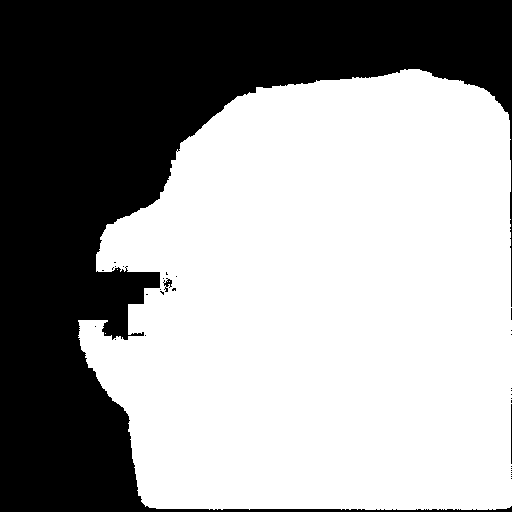

In [12]:
agent.chat("Show me a mask of the snowy capybaras")

Having access to the past history is great to repeatedly iterate on a given prompt. However, it has its limitations and sometimes you'd like to have a clean history. In order to do so, you can use the following method:

In [13]:
agent.prepare_for_new_chat()

## Tools

So far we've been using the tools that the agent has access to. These tools are the following:

- **Document question answering**: given a document (such as a PDF) in image format, answer a question on this document (Donut)
- **Text question answering**: given a long text and a question, answer the question in the text (Flan-T5)
- **Unconditional image captioning**: Caption the image! (BLIP)
- **Image question answering**: given an image, answer a question on this image (VILT)
- **Image segmentation**: given an image and a prompt, output the segmentation mask of that prompt (CLIPSeg)
- **Speech to text**: given an audio recording of a person talking, transcribe the speech into text (Whisper)
- **Text to speech**: convert text to speech (SpeechT5)
- **Zero-shot text classification**: given a text and a list of labels, identify to which label the text corresponds the most (BART)
- **Text summarization**: summarize a long text in one or a few sentences (BART)
- **Translation**: translate the text into a given language (NLLB)

We also support the following community-based tools:

- **Text downloader**: to download a text from a web URL
- **Text to image**: generate an image according to a prompt, leveraging stable diffusion
- **Image transformation**: transforms an image

We can therefore use a mix and match of different tools by explaining in natural language what we would like to do.

But what about adding new tools? Let's take a look at how to do that 

### Adding new tools

We'll add a very simple tool so that the demo remains simple: we'll use the awesome cataas (Cat-As-A-Service) API to get random cats on each run.

We can get a random cat with the following code:

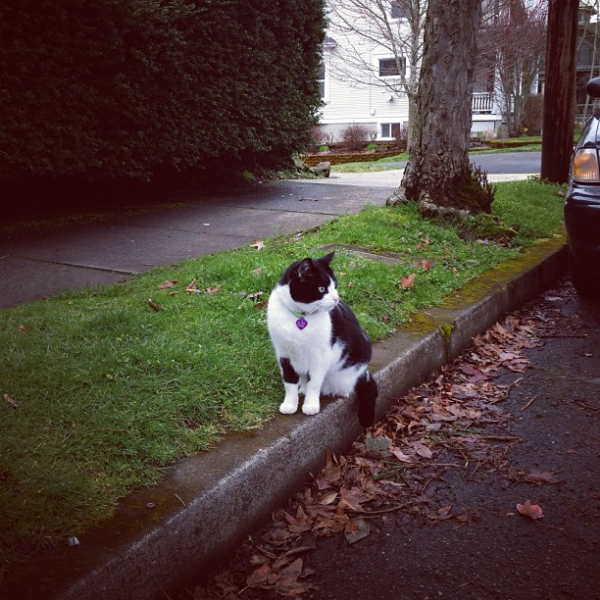

In [14]:
import requests
from PIL import Image

image = Image.open(requests.get('https://cataas.com/cat', stream=True).raw)
image

Let's create a tool that can be used by our system!

All tools depend on the superclass Tool that holds the main attributes necessary. We'll create a class that inherits from it:

In [15]:
from transformers import Tool

class CatImageFetcher(Tool):
    pass

This class has a few needs:

- An attribute name, which corresponds to the name of the tool itself. To be in tune with other tools which have a performative name, we'll name it text-download-counter.
- An attribute description, which will be used to populate the prompt of the agent.
- inputs and outputs attributes. Defining this will help the python interpreter make educated choices about types, and will allow for a gradio-demo to be spawned when we push our tool to the Hub. They're both a list of expected values, which can be text, image, or audio.
- A __call__ method which contains the inference code. This is the code we've played with above!

Here’s what our class looks like now:

In [16]:
from transformers import Tool
from huggingface_hub import list_models


class CatImageFetcher(Tool):
    name = "cat_fetcher"
    description = ("This is a tool that fetches an actual image of a cat online. It takes no input, and returns the image of a cat.")

    inputs = []
    outputs = ["text"]

    def __call__(self):
        return Image.open(requests.get('https://cataas.com/cat', stream=True).raw).resize((256, 256))

We can simply use and test the tool directly:

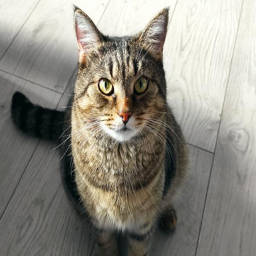

In [17]:
tool = CatImageFetcher()
tool()

In order to pass the tool to the agent, we recommend instantiating the agent with the tools directly:

In [18]:
from transformers.tools import HfAgent

agent = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoder", additional_tools=[tool])

Let's try to have the agent use it with other tools!

In [19]:
agent.run("Fetch an image of a cat online and caption it for me")

==Explanation from the agent==
I will use the following  tools: `cat_fetcher` to fetch an image of a cat, then `image_captioner` to caption it.


==Code generated by the agent==
cat = cat_fetcher()
caption = image_captioner(cat)


==Result==


'a person holding a small kitten in their hand'

Success 🎉

The tool was used to fetch a cat image, and the image captioning tool was used shortly after in order to caption that same image.

Finally, we recommend pushing the tool to the Hub in order to have others benefit from it. Here is the documentation that contains more information in order to do so: [Adding a new tool](https://huggingface.co/docs/transformers/en/custom_tools#creating-a-new-tool)

Thanks for following through with the notebook! We're looking forward to the tools you'll push, which will help empower all agents.